<a href="https://colab.research.google.com/github/joyjixu/game_theory/blob/main/game_theory_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd


# Plotting F(v)

In [42]:
# We have calculated mu = 32.821, sigma = 9.404

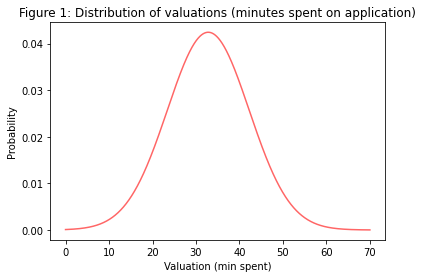

In [43]:
fig, ax = plt.subplots()

x = np.linspace(0,70,1000)
ax.plot(x,norm.pdf(x, loc=32.821, scale=9.404),'r-', alpha=0.6, label='norm pdf')
plt.xlabel("Valuation (min spent)")
plt.ylabel("Probability")
plt.title("Figure 1: Distribution of valuations (minutes spent on application)")
plt.savefig("valuations", dpi=200)

In [64]:
distribution = norm(loc=32.821, scale=9.404)

# example of F(60)
print("F(60):", distribution.cdf(60))

#check if F(30) should be approx 38
print("F(30):", distribution.cdf(30))

F(60): 0.9980747289229638
F(30): 0.38209668901972693


# Cost Function

In [45]:
# defining a function that takes bidder characteristics as input and returns cost
def get_cost(applications, months_experience, hours_search, days, verbose=False):

  hours_experience = 30.5*24*months_experience
  time_searching = integrate.quad(lambda x: x*hours_search, 0, days)[0]
  cost = np.sqrt((time_searching*applications)/hours_experience)

  
  if verbose==True:
    print("applications: {}, months experience: {}, hours spent applying per day: {}, days applying: {}".format(applications, months_experience, hours_search, days))
    print("Cost indicator:", cost)

  if cost<0:
    return 0

  return cost


# player j
print("j:", get_cost(100,4,1,5, verbose = True))
# player i
print("i:", get_cost(200,1,2,10, verbose = True))

applications: 100, months experience: 4, hours spent applying per day: 1, days applying: 5
Cost indicator: 0.6533854668616459
j: 0.6533854668616459
applications: 200, months experience: 1, hours spent applying per day: 2, days applying: 10
Cost indicator: 5.227083734893167
i: 5.227083734893167


# Optimal Bid

In [46]:
# defining a function that takes bidder characteristics and value v as input, and returns optimal bid b*i, taking into account cost

def get_bid(applications, months_experience, hours_search, days, v):
  distribution = norm(loc=32.821, scale=9.404)
  denominator = distribution.cdf(v)
  numerator = integrate.quad(lambda x: distribution.cdf(x), 0, v)[0]
  c=get_cost(applications, months_experience, hours_search, days)

  bid = v -c -(numerator/denominator)

  return bid

In [47]:
 # function that return the expected utility (in payoff matrix, this corresponds to omega 1, (bi,bj))
 def get_expected_util(applications, months_experience, hours_search, days, v):
  
  bid = get_bid(applications, months_experience, hours_search, days, v)

  c = get_cost(applications, months_experience, hours_search, days)

  distribution = norm(loc=32.821, scale=9.404)
  F = (distribution.cdf(v))

  expected_util = (v-bid-c)*F


  return expected_util

In [48]:
# function that return the actual utility (in payoff matrix, this corresponds the rest of the cells)
# bid can be specified manually else it automatically calculates the optimal bidding strategy
# if divide=True, then the utility will be divided by two (for the cases in the payoff matrix where the bids match)

def get_actual_util(applications, months_experience, hours_search, days, v, bid=None, divide=False):
  if bid is None:
    bid = get_bid(applications, months_experience, hours_search, days, v)

  c = get_cost(applications, months_experience, hours_search, days)
  print(bid, c)
  util = v-bid-c

  if divide==True:
    return util/2

  return util

# Calculating numerical utility for matrices

we know that v=60

## Omega 1

In [49]:
# calculate what B is
B = get_bid(100,4,1,5,60)
print("B:",B)

# calculate what b_i is
b_i = get_bid(200,1,2,10,60)
print("b_i:",b_i)



B: 32.110480171439505
b_i: 27.53678190340798


In [50]:
# (bi,bj)
# i and j get same utilities as same cost
util = get_expected_util(200,1,2,10,60)

print("player i:", util)
print("player j:", util)

top_left=str((util,util))

player i: 27.183697419961998
player j: 27.183697419961998


In [51]:
#(bi,B)

util_i = 0
util_j = get_actual_util(200,1,2,10,60, bid=B)

print("player i:", util_i)
print("player j:", util_j)

top_right=str((util_i,util_j))

32.110480171439505 5.227083734893167
player i: 0
player j: 22.662436093667328


In [52]:
#(B,bi)

util_i = get_actual_util(200,1,2,10,60, bid=B)
util_j = 0

print("player i:", util_i)
print("player j:", util_j)

bottom_left=str((util_i,util_j))

32.110480171439505 5.227083734893167
player i: 22.662436093667328
player j: 0


In [53]:
#(B,B)

util_i = get_actual_util(200,1,2,10,60, bid=B, divide=True)
util_j = get_actual_util(200,1,2,10,60, bid=B, divide=True)

print("player i:", util_i)
print("player j:", util_j)

bottom_right=str((util_i,util_j))

32.110480171439505 5.227083734893167
32.110480171439505 5.227083734893167
player i: 11.331218046833664
player j: 11.331218046833664


In [54]:
matrix = np.array([[(top_left),(top_right)], [(bottom_left),(bottom_right)]])
df = pd.DataFrame(matrix, columns=['bj','B'], index=['bi','B'])
df

,bj,B
bi,"(27.183697419961998, 27.183697419961998)","(0, 22.662436093667328)"
B,"(22.662436093667328, 0)","(11.331218046833664, 11.331218046833664)"


The utilities were rounded to 2 decimal places


## Omega 2

In [55]:
#(bi,bi)
util_i = get_actual_util(200,1,2,10,60, divide=True)
util_j = get_actual_util(100,4,1,5,60, bid=b_i, divide=True)

print("player i:", util_i)
print("player j:", util_j)

top_left=str((util_i,util_j))

27.53678190340798 5.227083734893167
27.53678190340798 0.6533854668616459
player i: 13.618067180849424
player j: 15.904916314865185


In [56]:
#(bi,B)
util_i = 0
util_j = get_actual_util(100,4,1,5,60)

print("player i:", util_i)
print("player j:", util_j)

top_right=str((util_i,util_j))

32.110480171439505 0.6533854668616459
player i: 0
player j: 27.23613436169885


In [57]:
#(B,bi)
util_i = get_actual_util(200,1,2,10,60, bid = B)
util_j = 0

print("player i:", util_i)
print("player j:", util_j)

bottom_left=str((util_i,util_j))

32.110480171439505 5.227083734893167
player i: 22.662436093667328
player j: 0


In [58]:
#(B,B)
util_i = get_actual_util(200,1,2,10,60, bid=B, divide=True)
util_j = get_actual_util(100,4,1,5,60, divide=True)

print("player i:", util_i)
print("player j:", util_j)

bottom_right=str((util_i,util_j))

32.110480171439505 5.227083734893167
32.110480171439505 0.6533854668616459
player i: 11.331218046833664
player j: 13.618067180849424


In [59]:
matrix = np.array([[(top_left),(top_right)], [(bottom_left),(bottom_right)]])

In [60]:
df = pd.DataFrame(matrix, columns=['bi','B'], index=['bi','B'])
df

,bi,B
bi,"(13.618067180849424, 15.904916314865185)","(0, 27.23613436169885)"
B,"(22.662436093667328, 0)","(11.331218046833664, 13.618067180849424)"
